In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r"D:\Instacart Basket Analysis\02 Data\Prepared Data"

In [3]:
#importing df
ords_prods=pd.read_pickle(os.path.join(path,"df_def.pkl"))

In [4]:
#checking columns in order to check data security
ords_prods.dtypes

order_id                      int64
user_id                      object
order_number                  int64
orders_days_of_the_week       int64
time_of_day                   int64
days_since_prior_order      float64
product_id                    int64
add_to_cart_order             int64
reordered                     int64
Unnamed: 0_y                  int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
price_range_loc              object
busiest_days                 object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
avg_price                   float64
spending_flag                object
median_pur                  float64
ord_fre_flag                 object
First_Name                   object
surname                      object
Gender                       object
STATE                        object
Age                         

In [5]:
# wrangling columns for PII 1 First_Name
ords_prods=ords_prods.drop(columns = ['First_Name'])

In [6]:
# wrangling columns for PII 2 surname
ords_prods=ords_prods.drop(columns = ['surname'])

In [7]:
# creating geographic areas, checking head
ords_prods.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,median_pur,ord_fre_flag,Gender,STATE,Age,fam_membs,fam_status,income,True,department
0,2539329,1,1,2,8,NaN,196,1,0,195,...,20.5,Regular customer,Female,Alabama,31,3,married,40423,both,beverages
1,2398795,1,2,3,7,15.0,196,1,1,195,...,20.5,Regular customer,Female,Alabama,31,3,married,40423,both,beverages
2,473747,1,3,3,12,21.0,196,1,1,195,...,20.5,Regular customer,Female,Alabama,31,3,married,40423,both,beverages
3,2254736,1,4,4,7,29.0,196,1,1,195,...,20.5,Regular customer,Female,Alabama,31,3,married,40423,both,beverages
4,431534,1,5,4,15,28.0,196,1,1,195,...,20.5,Regular customer,Female,Alabama,31,3,married,40423,both,beverages


In [4]:
#Counting state
ords_prods["STATE"].value_counts(dropna=False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [5]:
#Derivation column Region
Region=[]
for value in ords_prods["STATE"]:
  if (value=="Maine")or (value=="New Hampshire")or(value=="Vermont")or(value=="Massachusetts")or(value=="Rhode Island")or(value=="Connecticut")or(value=="New York")or(value=="Pennsylvania")or(value=="New Jersey"):
    Region.append("Northeast")
  elif (value=="Wisconsin")or(value=="Michigan")or(value=="Illinois")or(value=="Indiana")or(value=="Ohio")or(value=="North Dakota")or(value=="South Dakota")or(value=="Nebraska")or(value=="Kansas")or(value=="Minnesota")or(value=="Iowa")or(value=="Missouri"):
    Region.append("Midwest")
  elif (value=="Delaware")or(value=="Maryland")or(value=="District of Columbia")or(value=="Virginia")or(value=="West Virginia")or(value=="North Carolina")or(value=="South Carolina")or(value=="Georgia")or(value=="Florida")or(value=="Kentucky")or(value=="Tennessee")or(value=="Mississippi")or(value=="Alabama")or(value=="Oklahoma")or(value=="Texas")or(value=="Arkansas")or(value=="Louisiana"):
    Region.append("South")
  else:
    Region.append("West")

In [6]:
#adding region column
ords_prods["Region"]=Region

In [7]:
#checking region
ords_prods["Region"].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [8]:
#crosstab region and spending
region_spend = pd.crosstab(ords_prods["Region"], ords_prods["spending_flag"], dropna = False)

In [ ]:
region_spend.to_clipboard()

In [13]:
region_spend

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


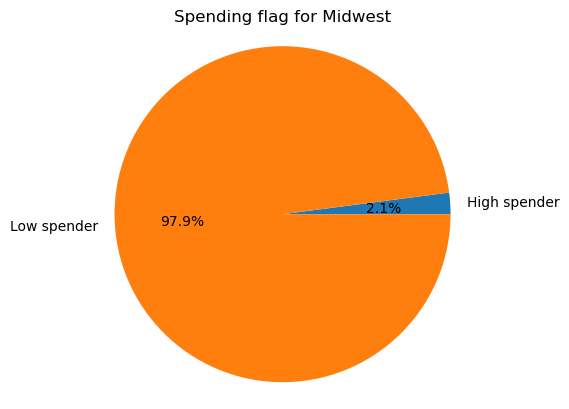

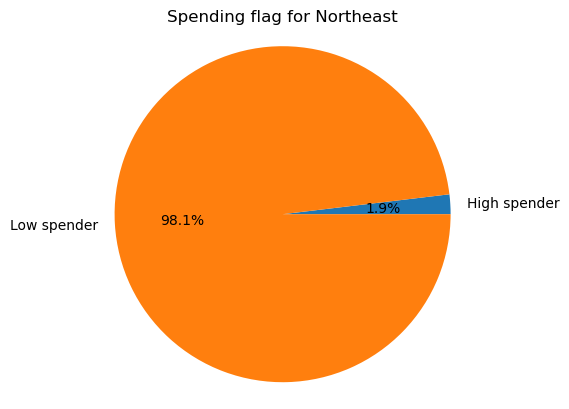

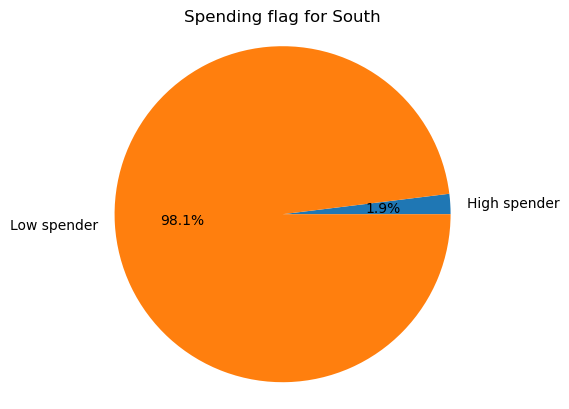

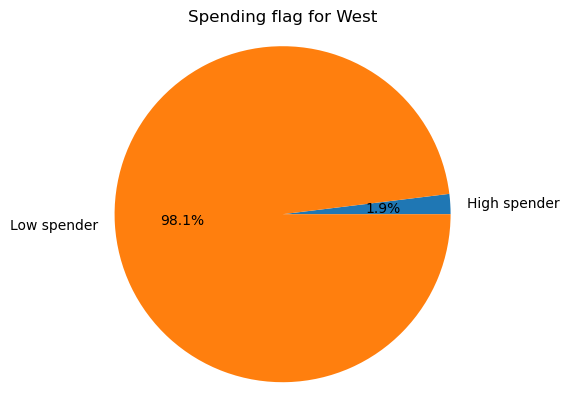

In [10]:
for region, row in region_spend.iterrows():
    # create pie chart for the region
    plt.pie(row, labels=row.index, autopct='%1.1f%%')
    plt.title(f"Spending flag for {region}")
    plt.axis('equal')
    plt.show()

In [14]:
region_spend.to_clipboard

<bound method NDFrame.to_clipboard of spending_flag  High spender  Low spender
Region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559>

In [13]:
#crosstab region department
region_department = pd.crosstab(ords_prods["Region"], ords_prods["department"], dropna = False)

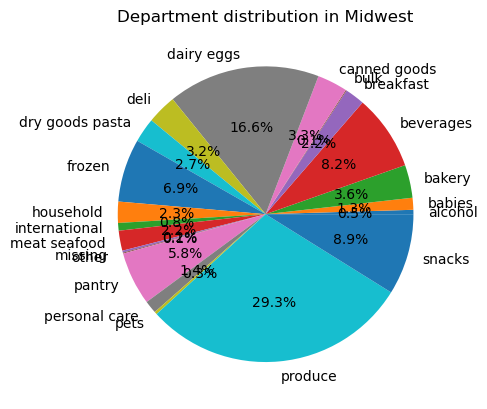

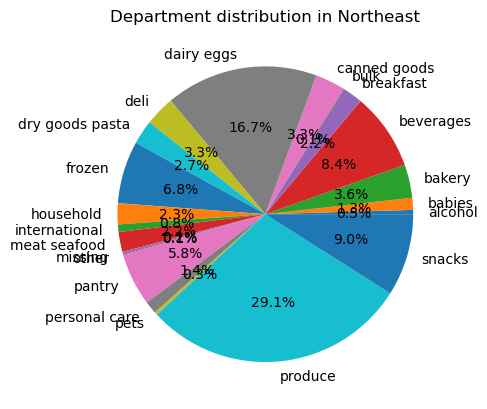

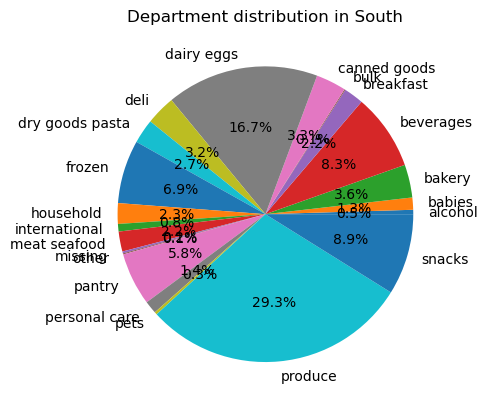

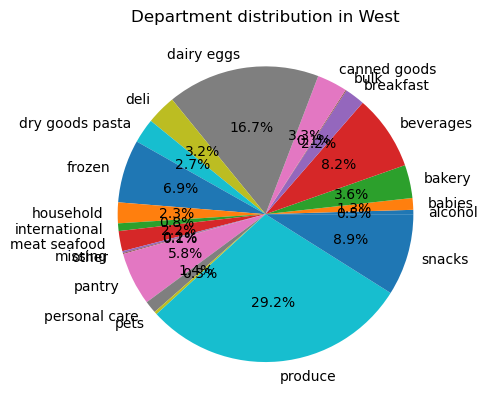

In [16]:

for region in region_department.index:
    
    region_counts = region_department.loc[region]
    
   
    plt.figure()
    plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
    plt.title(f"Department distribution in {region}")
    

plt.show()

In [17]:
plt.savefig("Department distribution in {region}.pdf")

<Figure size 640x480 with 0 Axes>

#### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [27]:
#locating low activity customer
ords_prods.loc[ords_prods['max_order'] < 5, 'Active_cust'] = 'Low activity customerst'

In [28]:
#locating high activity customer
ords_prods.loc[ords_prods['max_order'] >= 5, 'Active_cust'] = 'High activity customerst'

In [29]:
ords_prods["Active_cust"].value_counts(dropna=False)

High activity customerst    30964564
Low activity customerst      1440295
Name: Active_cust, dtype: int64

In [21]:
# subset of high activity customer
high_act_cust=ords_prods[ords_prods['Active_cust'] == 'High activity customerst']

In [22]:
high_act_cust.to_pickle(r"C:\Users\galia\Instacart Basket Analysis\02 Data\Prepared Data\high_act_cts.pkl")

### Customer profiling

In [30]:
#Create a profiling variable based on age
ords_prods["Age"].min()

18

In [31]:
ords_prods["Age"].max()

81

In [32]:
ords_prods["Age"].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [33]:
ords_prods.loc[ords_prods['Age'] <= 30, 'Age_range'] = '18-35'
ords_prods.loc[(ords_prods['Age'] <= 65) & (ords_prods['Age'] > 30), 'Age_range'] = '35-65' 
ords_prods.loc[ords_prods['Age'] > 65, 'Age_range'] = '65+'
ords_prods['Age_range'].value_counts(dropna=False)

35-65    17717399
65+       8088101
18-35     6599359
Name: Age_range, dtype: int64

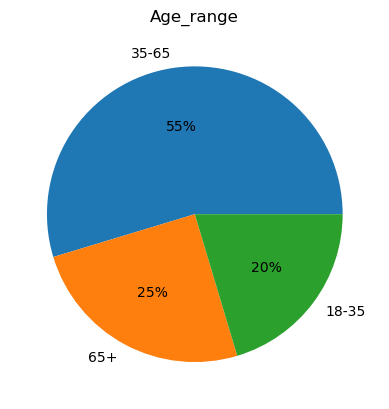

In [28]:
#creating a chart of customer age 
age_profile_pie = ords_prods['Age_range'].value_counts().plot.pie(title ='Age_range', label = '', autopct=('%1.f%%'))

### Income profiling

In [34]:
#creating income flag
income_flag = []
for income in ords_prods['income'].tolist():
    if income < 75000:
        income_flag.append('Low income')
    elif income >= 75000 and income < 150000:
        income_flag.append('Mid income')
    elif income >= 150000:
        income_flag.append('High income')
    else:
        print('Outlier value', row)

In [35]:
#adding the new income column
ords_prods["Income_lvl"]=income_flag

In [36]:
ords_prods["Income_lvl"].value_counts(dropna=False)

Mid income     17910512
Low income     10442766
High income     4051581
Name: Income_lvl, dtype: int64

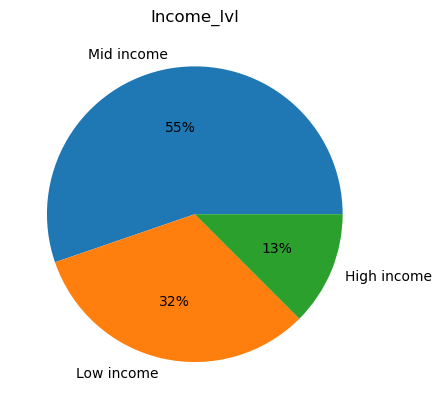

In [37]:
#chart for income
income_profile_pie = ords_prods['Income_lvl'].value_counts().plot.pie(title ='Income_lvl', label = '', autopct=('%1.f%%'))

In [38]:
family_cross = pd.crosstab(ords_prods['fam_status'], ords_prods['fam_membs'], dropna = False)

In [39]:
family_cross

fam_membs,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


#no single or divorced/widowed lives with more family members 

In [40]:
# Create family_status classification
ords_prods.loc[(ords_prods['fam_membs'] == 0), 'dependants'] = 'No dependants'
ords_prods.loc[(ords_prods['fam_membs'] >= 1), 'dependants'] = 'Have dependants'

In [41]:
ords_prods['dependants'].value_counts(dropna = False)

Have dependants    24307356
No dependants       8097503
Name: dependants, dtype: int64

### Deparment profile

In [42]:
ords_prods["department"].value_counts(dropna=False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [43]:
#creating crosstab department_id and user_id
dep_user_c = pd.crosstab(ords_prods['department_id'], ords_prods['user_id'], dropna = False)

In [44]:
dep_user_c

user_id,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,3,0,...,13,16,4,9,12,7,51,4,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,2,1,56,8,17,1,2,0,...,1,0,2,4,7,2,4,3,0,7
4,5,72,10,34,340,51,393,0,10,0,...,196,78,4,22,68,10,20,10,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
6,0,1,0,0,2,1,24,0,0,0,...,0,1,2,0,0,0,1,2,0,1
7,13,0,0,19,36,1,55,2,3,14,...,0,3,10,25,13,3,6,2,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,38,1,9,0,1,4,...,2,4,8,0,1,2,0,2,0,37


In [45]:
#assign diet flag  11 represent meat seafood
diet_dict = dict()
for user in dep_user_c:
    worklist = dep_user_c[user].tolist()
    if worklist[11] == 0 :   
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-vegetarian'

In [46]:
#assign user flag to the diet_flag
diet_flag = []
for user in ords_prods['user_id']:
    diet_flag.append(diet_dict[user])

In [47]:
# Adding diet_flag to df as 'diet_profile'
ords_prods['diet_profile'] = diet_flag

In [48]:
ords_prods['diet_profile'].value_counts(dropna=False)

Non-vegetarian    23762619
Vegetarian         8642240
Name: diet_profile, dtype: int64

In [53]:
#diet habits income
crosstab_diet_income = pd.crosstab(ords_prods['diet_profile'], ords_prods['Income_lvl'], dropna = False)

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

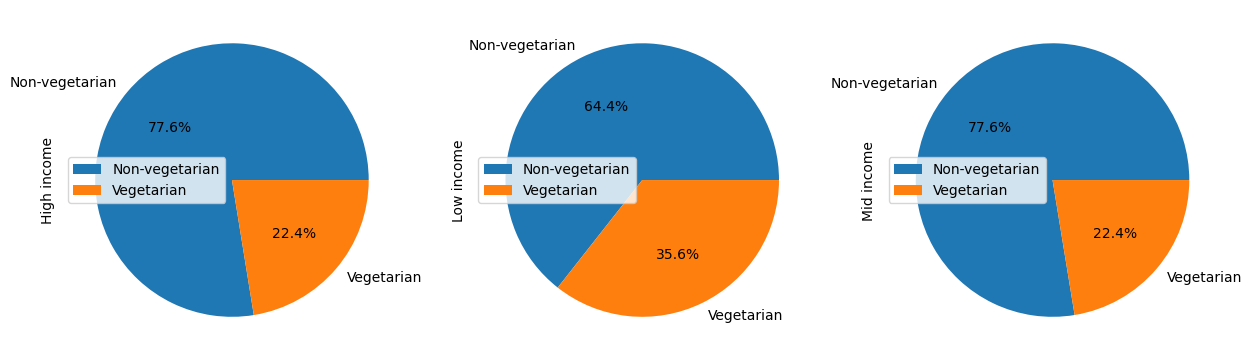

In [55]:
diet_income = crosstab_diet_income.plot.pie(subplots=True, figsize=(15,5), autopct='%1.1f%%')

diet_income.set_title("Relationship between Diet Profile and Income Level", fontsize=16)
diet_income.set_ylabel("")

plt.show()

In [56]:
#crosstab days since order loyalty flag
crosstab_loyal_daysince = pd.crosstab(ords_prods['days_since_prior_order'], ords_prods['loyalty_flag'], dropna = False)


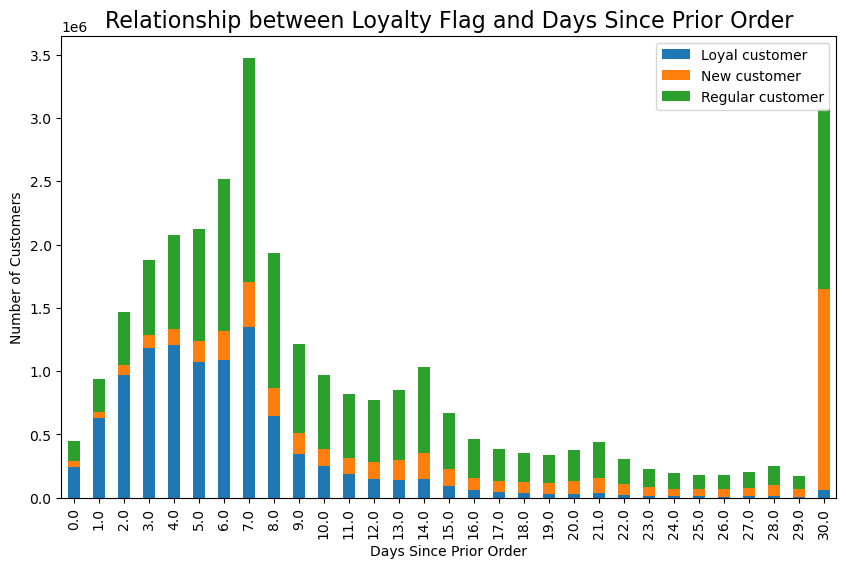

In [57]:
loyal_days = crosstab_loyal_daysince.plot(kind='bar', stacked=True, figsize=(10,6))


loyal_days.set_title("Relationship between Loyalty Flag and Days Since Prior Order", fontsize=16)
loyal_days.set_xlabel("Days Since Prior Order")
loyal_days.set_ylabel("Number of Customers")

loyal_days.legend(loc='upper right')


plt.show()

### 6 Create an appropriate visualization to show the distribution of profiles

In [44]:
path_vis=r"C:\Users\galia\Instacart Basket Analysis\04 Analysis\Visualizations"

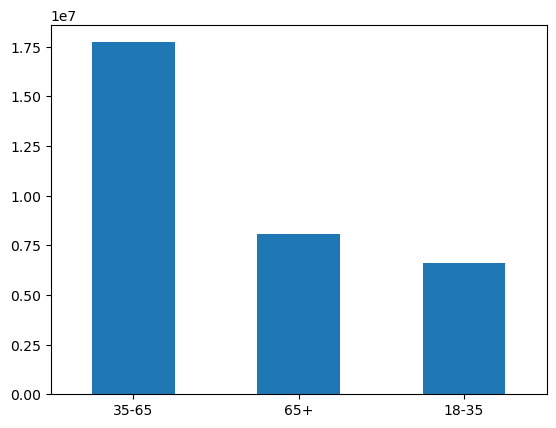

In [45]:
# distribution age range
age_prof_bar = ords_prods['Age_range'].value_counts().plot.bar(rot=0)

In [46]:
#exporting char age range
age_prof_bar.figure.savefig(os.path.join(path_vis,'age_prof_bar.png'))

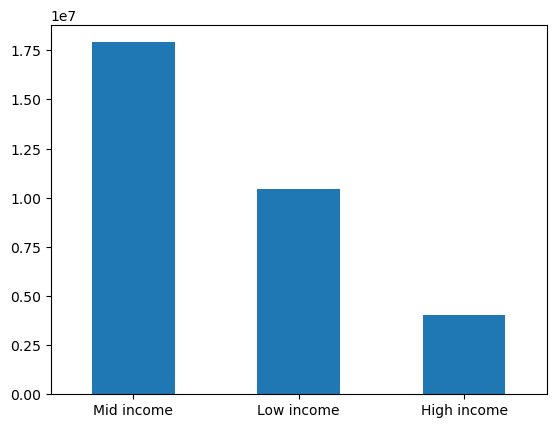

In [47]:
#income distribution
income_prof_bar = ords_prods['Income_lvl'].value_counts().plot.bar(rot=0)

In [48]:
#exporting char income
income_prof_bar.figure.savefig(os.path.join(path_vis,'inco_prof_bar.png'))

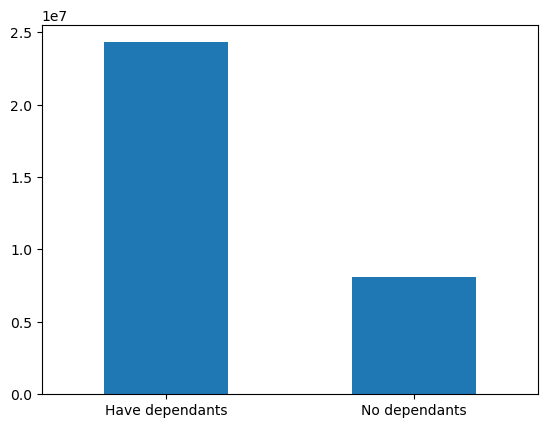

In [49]:
#dependant char
dep_prof_bar = ords_prods['dependants'].value_counts().plot.bar(rot=0)

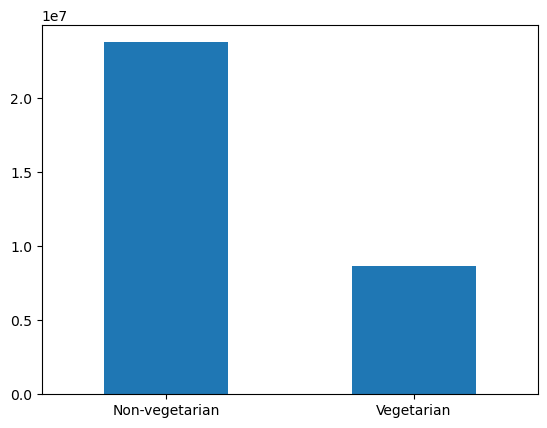

In [50]:
#diet profile char
diet_prof_bar = ords_prods['diet_profile'].value_counts().plot.bar(rot=0)

In [51]:
diet_prof_bar.figure.savefig(os.path.join(path_vis,'diet_prof_bar.png'))

### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [52]:
# age range aggregation
ords_prods.groupby('Age_range').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                            mean   max  min       mean      max  min
Age_range                                                           
18-35                  11.134870  30.0  0.0  12.059656  99999.0  1.0
35-65                  11.103184  30.0  0.0  12.015347  99999.0  1.0
65+                    11.080922  30.0  0.0  11.838480  99999.0  1.0

#####  Usage frequency and expenditure is similar in across all ages ranges, beside that  the mean of prices is lower in the age group of 65+

In [53]:
#Income_lvl aggregation
ords_prods.groupby('Income_lvl').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                              mean   max  min       mean      max  min
Income_lvl                                                            
High income              10.941393  30.0  0.0  32.889850  99999.0  1.0
Low income               11.240514  30.0  0.0   7.443285  14900.0  1.0
Mid income               11.061703  30.0  0.0   9.895482  99999.0  1.0

##### The mean for all groups in day since prior order, is similar in all income groups. About prices we can notice a relation between the prices and level of income

In [54]:
# number of dependant aggregation
ords_prods.groupby('dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                  mean   max  min       mean      max  min
dependants                                                                
Have dependants              11.111834  30.0  0.0  11.930584  99999.0  1.0
No dependants                11.080805  30.0  0.0  12.129243  99999.0  1.0

##### For number of dependants there is no significance in usage frequency and expenditure.

In [55]:
# diet profile aggregation
ords_prods.groupby('diet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                 mean   max  min       mean      max  min
diet_profile                                                             
Non-vegetarian              10.762605  30.0  0.0  12.042126  99999.0  1.0
Vegetarian                  12.071076  30.0  0.0  11.810025  99999.0  1.0

##### The table shows that vegetarian a lower frequency of purchase than non vegetarian, they go less to shop. Also they purchase cheap products in comparison to non vegetarian

## 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Income/region/department analysis

In [56]:
crosstab_region_income = pd.crosstab(ords_prods['Region'], ords_prods['Income_lvl'], dropna = False)

In [57]:
crosstab_region_income

Income_lvl,High income,Low income,Mid income
Region,,,
Midwest,955948,2427882,4213495
Northeast,706788,1822149,3193799
South,1342212,3492975,5956698
West,1046633,2699760,4546520


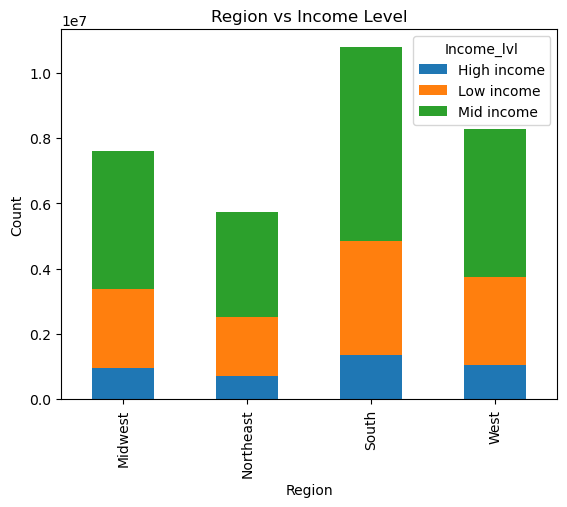

In [58]:
#tacked bar chart region vs income lvl
region_income=crosstab_region_income.plot(kind='bar', stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region vs Income Level')

plt.show()

#### We can notice that across all regions customer with mid income represent the biggest proportion 

In [59]:
# crosstab department and income lvl
crosstab_department_income = pd.crosstab(ords_prods['department'], ords_prods['Income_lvl'], dropna = False)

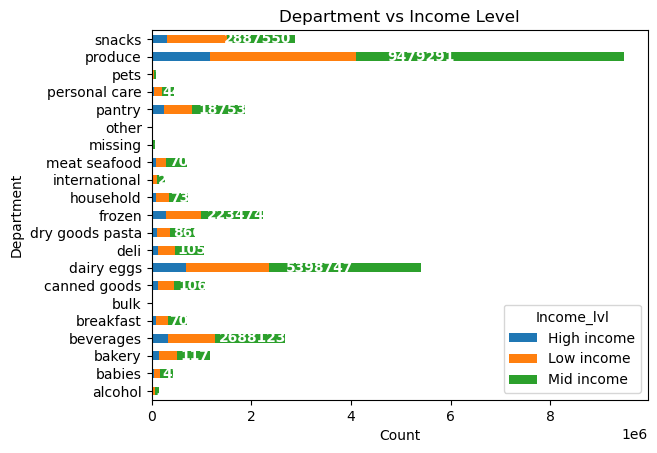

In [60]:
#dept /income
dept_income=crosstab_department_income.plot(kind='barh', stacked=True)

plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Department vs Income Level')


for i, label in enumerate(crosstab_department_income.index):
    total = sum(crosstab_department_income.loc[label])
    plt.text(total/2, i, str(total), va='center', color='white', fontweight='bold')

plt.show()


#### The same trend is exposed in the income vs department mid income customer, here however there is 60% of consume in meat and seafood and also shows that this customer have bigger percentage in babies department this can indicate this customer have more babies in comparison to the other 2 groups

### Age/region/department analysis

In [61]:
#create crosstab department/age
crosstab_department_age = pd.crosstab(ords_prods['department'], ords_prods['Age_range'], dropna = False)

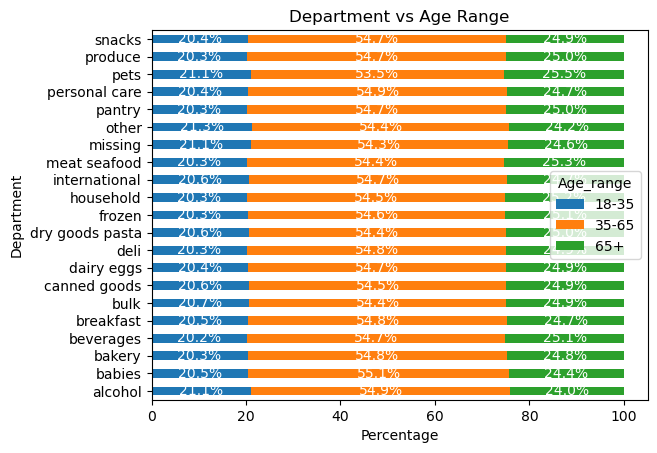

In [62]:
row_sums = crosstab_department_age.sum(axis=1)

crosstab_department_age = crosstab_department_age.div(row_sums, axis=0) * 100

dep_age = crosstab_department_age.plot(kind='barh', stacked=True)

dep_age.set_xlabel('Percentage')
dep_age.set_ylabel('Department')
dep_age.set_title('Department vs Age Range')

for i, (name, row) in enumerate(zip(crosstab_department_age.index, crosstab_department_age.values)):
    x_offset = 0
    for j, value in enumerate(row):
        if value > 0:
            dep_age.text(value/2 + x_offset, i, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10)
            x_offset += value

plt.show()

#### The group age between 35-65 are the biggest consumer for all deparments and the trend is similar for other age groups showing the demand by age group is stable in all department. from here we deduct that also the range group of 35-65 is the one with high income

In [63]:
crosstab_income_age = pd.crosstab(ords_prods['Income_lvl'], ords_prods['Age_range'], dropna = False)

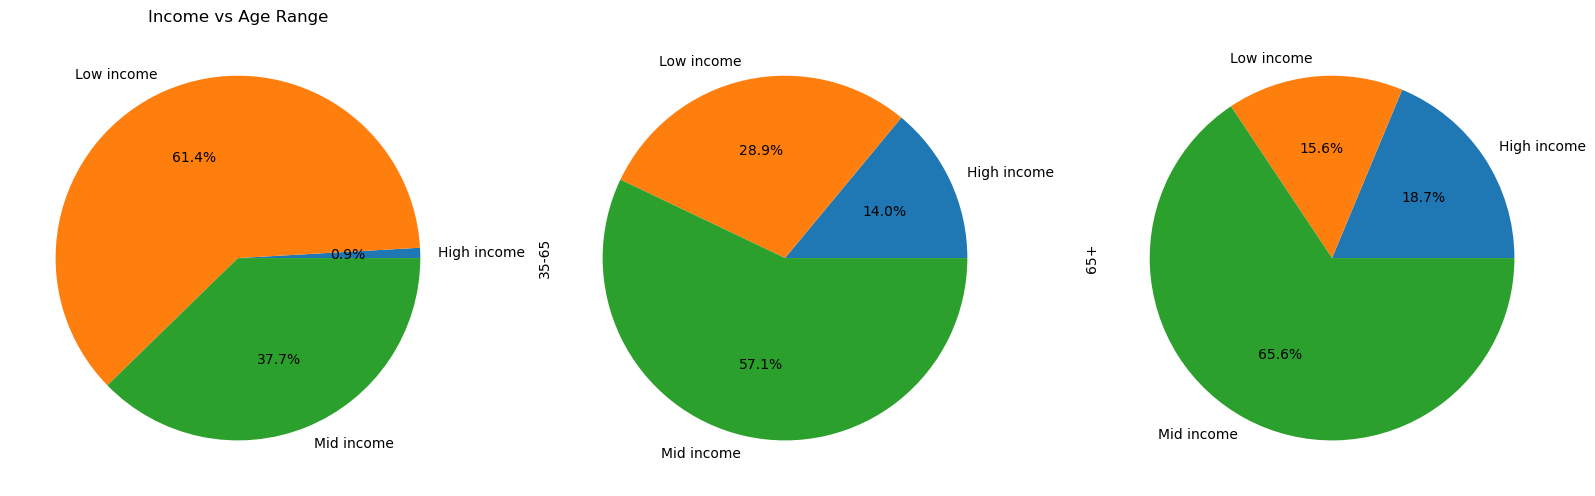

In [64]:
income_age= crosstab_income_age.plot.pie(subplots=True, figsize=19, 20), autopct='%1.1f%%', legend=False)

income_age[0].set_ylabel('')
income_age[0].set_title('Income vs Age Range')

plt.show()


#### The can notice trough the graphs that when people get older the income begin to increase 

In [65]:
crosstab_department_age = pd.crosstab(ords_prods['Region'], ords_prods['Age_range'], dropna = False)

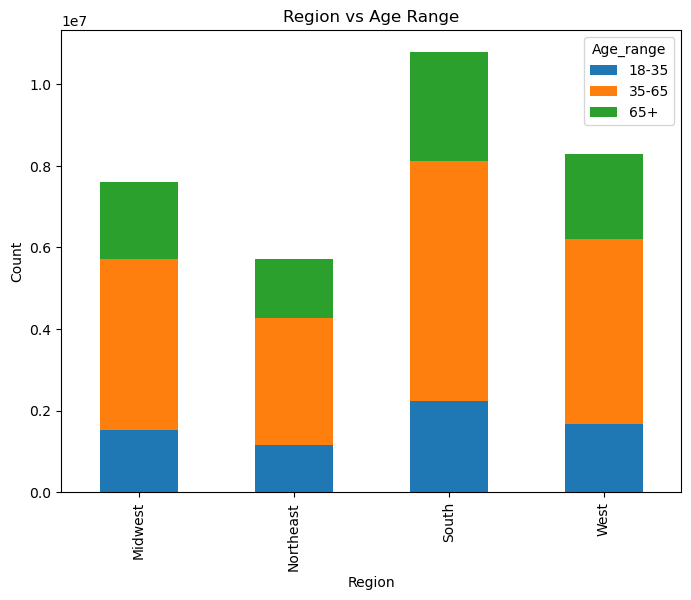

In [66]:
region_age = crosstab_department_age.plot.bar(stacked=True, figsize=(8, 6))

region_age.set_xlabel('Region')
region_age.set_ylabel('Count')
region_age.set_title('Region vs Age Range')

plt.show()

#### We can observe a similar distribution for age range in all regions, also South region is the bigger one in terms of observation deriving that is posible we have more impact in this region

### Diet profile/region/department

In [67]:
crosstab_department_diet = pd.crosstab(ords_prods['department'], ords_prods['diet_profile'], dropna = False)

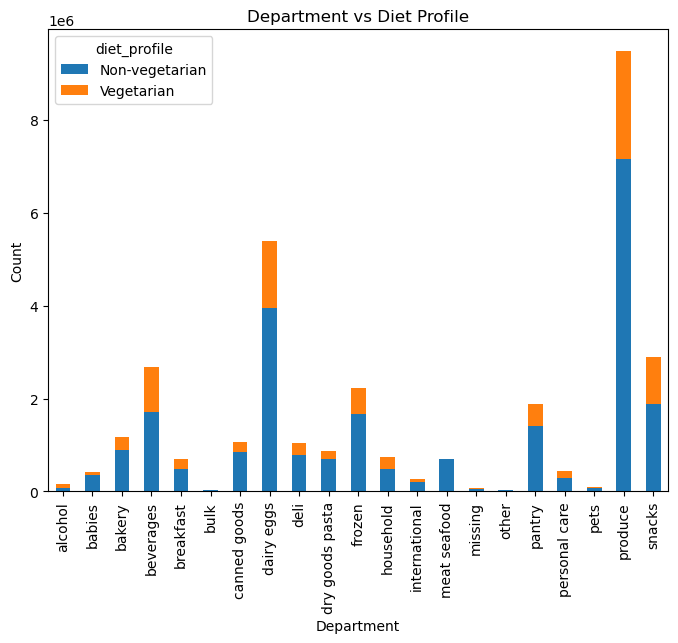

In [68]:
stack_dep_diet = crosstab_department_diet.plot.bar(stacked=True, figsize=(8, 6))

stack_dep_diet.set_xlabel('Department')
stack_dep_diet.set_ylabel('Count')
stack_dep_diet.set_title('Department vs Diet Profile')

plt.show()

#### we can notive that the non vegetarian represent the big part of consumer for all departments, we can assume the % of vegetarian is small in comparison with the total

In [69]:
crosstab_department_diet = pd.crosstab(ords_prods['Region'], ords_prods['diet_profile'], dropna = False)

In [70]:
crosstab_pct = pd.crosstab(ords_prods['Region'], ords_prods['diet_profile'], normalize='index')

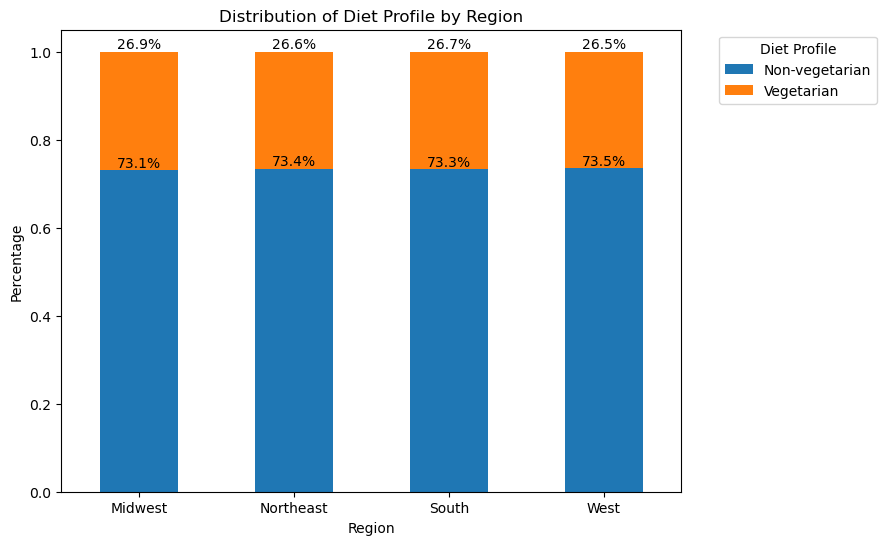

In [71]:
# stacked bar chart with percentages
diet_region = crosstab_pct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.legend(title='Diet Profile', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Distribution of Diet Profile by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

totals = crosstab_pct.sum(axis=1)
for i in diet_region.containers:
    diet_region.bar_label(i, label_type='edge', labels=['{:.1%}'.format(j) for j in i.datavalues/totals])



#### This char show a similar distribution of the percentage of vegetarian in every region

## dependants/region/departmens

In [72]:
crosstab_region_dep = pd.crosstab(ords_prods['Region'], ords_prods['dependants'], dropna=False)

In [73]:
crosstab_region_dep 

dependants,Have dependants,No dependants
Region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


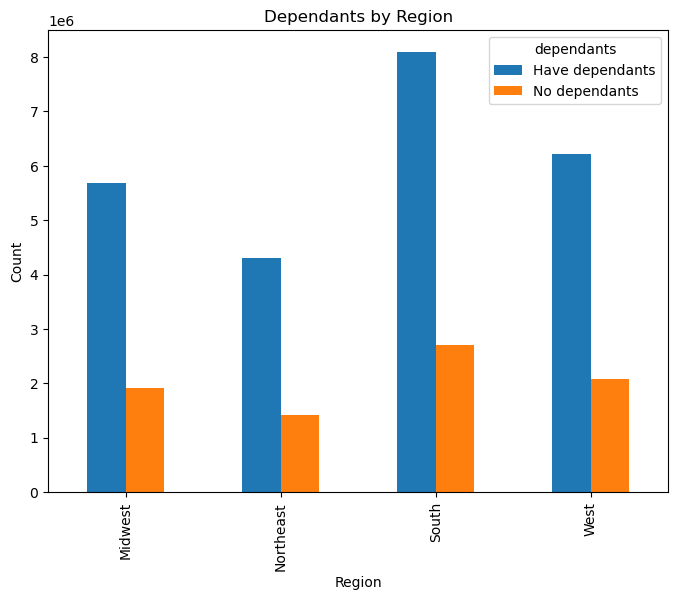

In [74]:
# bar chart
region_depent=crosstab_region_dep.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Region')
plt.ylabel('Count')

plt.title('Dependants by Region')

plt.show()

### Al the regions have similar proportion of people with dependants

In [75]:
crosstab_department_dep = pd.crosstab(ords_prods['department'], ords_prods['dependants'], dropna=False)

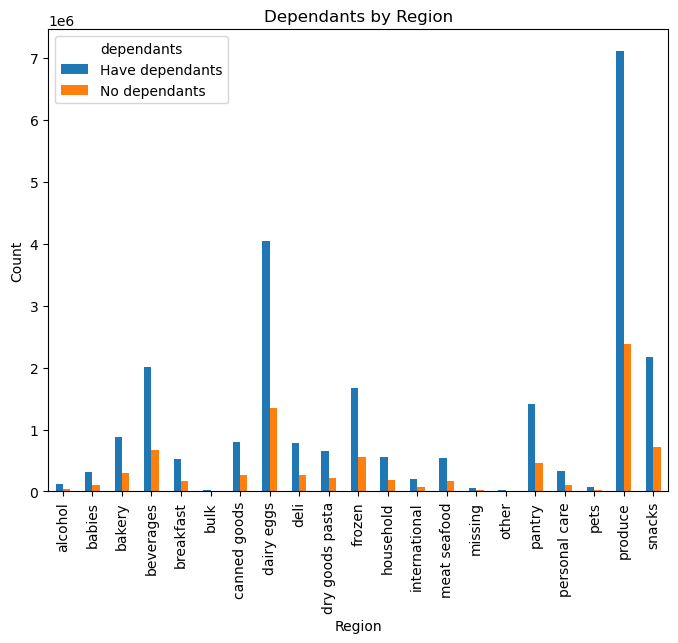

In [76]:
# Create the bar chart
depart_dependt=crosstab_department_dep.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Region')
plt.ylabel('Count')

plt.title('Dependants by Region')


plt.show()

### People that have dependant spend more on produce and dairy eggs in comparison with people who live alone(singles)

## Produce suitable charts to illustrate your results and export them in your project folder

In [77]:
#export age/deparment/region charts
dep_age.figure.savefig(os.path.join(path_vis,'department_age.png'))

In [78]:
###
income_age.savefig(os.path.join(path_vis,'income_age.png'))

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

In [ ]:
region_age.figure.savefig(os.path.join(path_vis,'region_age.png'))

In [ ]:
# exporting income/region/dep
region_income.figure.savefig(os.path.join(path_vis,'region_age.png'))

In [ ]:
dept_income.figure.savefig(os.path.join(path_vis,'region_age.png'))

In [79]:
#exporting diet/region/income
stack_dep_diet.figure.savefig(os.path.join(path_vis,'diet_departments.png'))

In [80]:
diet_region.figure.savefig(os.path.join(path_vis,'diet_region.png'))

In [81]:
#exporting number of deps/region/department
region_depent.figure.savefig(os.path.join(path_vis,'dependant_region.png'))

In [82]:
depart_dependt.figure.savefig(os.path.join(path_vis,'dependant_department.png'))

In [60]:
patsh=r"C:\Users\galia\Instacart Basket Analysis\02 Data\Prepared Data"

In [61]:
ords_prods.to_pickle(os.path.join(patsh,'ords_prods_def.pkl'))